# Multiple Linear Regression  

#### ANALYSIS OF CREIDT DATA 

Editor: Rasha Ashraf


# Import Libraries

In [64]:
import pandas as pd
import csv


import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the Credit Data

In [99]:
#read credit data
credit = pd.read_csv('H:\My Documents\TEACHING\Financial_Data_Analytics\MS_FINANCE_REVISED\DATA\credit.csv')


#view first 5 rows of the data
credit[:5]

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [66]:
#Droppong column 0 as t is not needed and storing the data in a new object
c2=credit.drop(credit.columns[0], axis=1)


#Checking to see if the new data has been created
c2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [67]:
#Let us clean our data little bit, So first check which are the columns the contains NaN values in it :
c2.isnull().any()

Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
Balance      False
dtype: bool

In [68]:
#Once the above code is executed, all the columns should give False, 
#In case for any column you find True result, then remove all the null values from that column using below code.
c2 = c2.fillna(method='ffill')


In [69]:
#Simple Lienar Regression Model: Does Income influence Credit Card Balance?

X = c2['Income']
y = c2['Balance']

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           1.03e-22
Time:                        11:50:35   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
##Perform Linear REgression with the data using SK LEarn, predict y_hat and find the MSE
X = c2['Income'].values.reshape(-1, 1)
y = c2['Balance'].values.reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(X, y)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


[246.51475059]
[[6.04836341]]


In [71]:
#To make predictions on the test data, execute the following script:
y_pred = regressor.predict(X)


In [72]:
#Now compare the actual output values for y with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,333,336.580930
1,903,887.792481
2,580,879.131225
3,964,1147.261223
4,331,584.509395


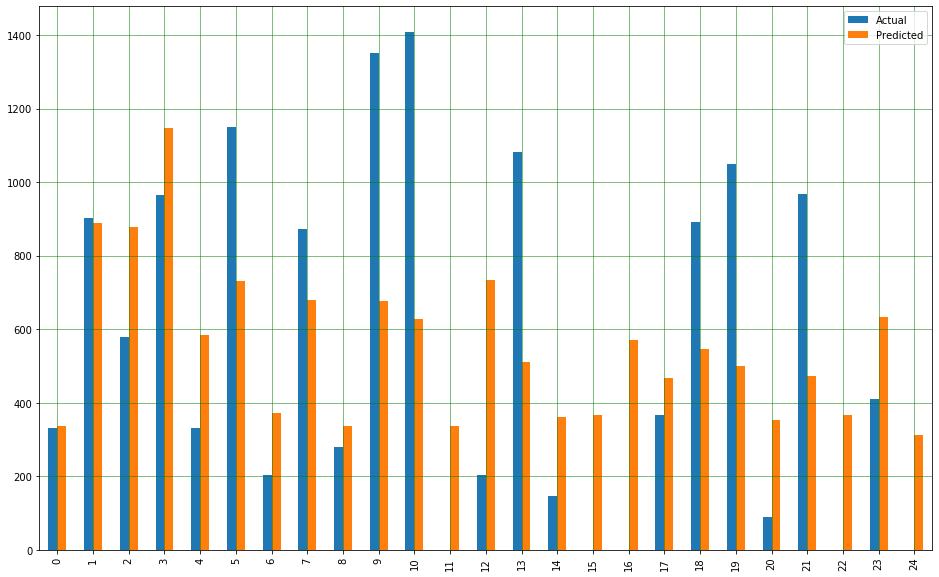

In [73]:
#We can also visualize comparison result as a bar graph using the below script :
#Note: As the number of records is huge, for representation purpose I’m taking just 25 records.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

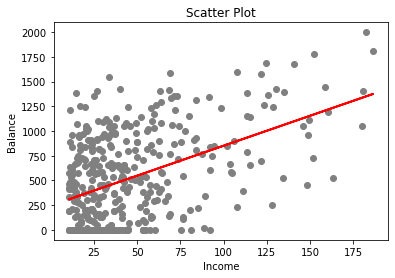

In [74]:
#Let's plot our straight line with the test data :
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)

plt.title("Scatter Plot")
plt.xlabel("Income")
plt.ylabel("Balance")
plt.show()


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))



Mean Absolute Error: 349.0613028688665
Mean Squared Error: 165521.86127696055
Root Mean Squared Error: 406.84377994134377


# Using Qualitative Predictors: Effect of Gender on Credit Card Balance

In [76]:
############################################################################
### Qualitative Predicotrs #################################################
############################################################################

## Gender is a categorical variable. Create a dummy variable for Gender ####
Gender_dummy=pd.get_dummies(c2['Gender'])
Gender_dummy.head()


,Male,Female
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [77]:
###Concatenate Gender_dummy with the original data #######
c2=pd.concat([c2,Gender_dummy], axis=1)
c2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,Female
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0


# See the effect of Gender on Credit Card Balance

In [78]:
X = c2['Female']
y = c2['Balance']

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\rashraf\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.669
Time:                        11:50:37   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        509.8031     33.128     15.389      0.000     444.675     574.931
Female        19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
### Instead of using Female Dummy, 
### you can use the categorical variable Gender directly in the model using flollwing
result = smf.ols(formula='Balance ~ Gender', data=c2).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.669
Time:                        11:50:37   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128  

# Interaction Terms with Qualitative Predictors

#### Question: Whether changes in income affect credit card balances for students and non-students differently



In [80]:
### Create a dummy variable for Student
Student_dummy=pd.get_dummies(c2['Student'])
Student_dummy.head()

### Change Column names of Student_dummy as it assigns Yes and No
Student_dummy.columns = ['Non_Student_Dummy','Student_Dummy']

###Concatenate Student_dummy with the original data #######
c2=pd.concat([c2,Student_dummy], axis=1)
c2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Male,Female,Non_Student_Dummy,Student_Dummy
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,1,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1,0,1,0


In [81]:
result = smf.ols(formula='Balance ~ Income + Student_Dummy + Income * Student_Dummy', data=c2).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           4.94e-28
Time:                        11:50:38   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              200.6232 

In [82]:
## Instead of creating dummy variable, you can use the categorical variable in the model directly
result = smf.ols(formula='Balance ~ Income + Student + Income * Student', data=c2).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           4.94e-28
Time:                        11:50:38   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

# Does Age Influence Credit Card Balance

In [83]:
############ Does Age Influence Credit Card Balance ################################################################
###################################################################################################################

result = smf.ols(formula='Balance ~ Age', data=c2).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001340
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.971
Time:                        11:50:38   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.2922     77.852      6.645      0.0

# Qualitative Predictors with More than Two Levels 


### Observe whether credit card balance is significantly different for different age group 


#### Construct Dummy variables based on four different age groups based on quartiles 

#### Consider the 4th qurtile group (Over 70) as the baseline  

#### Interpret the results of the estimated coefficients 




In [84]:
##### Qualitative Predictors with More than Two Levels ############

#### Observe the distribution of Age #######################
### Construct 4 dummy variables based on Age distribution: 
## 1. Age in 1st quartile (Below 40)
## 2. Age in 2nd qaurtile (Between 41 to 55)
## 3. Age in 3rd quartile (Between 56 to 69)
## 4. Age in 4th quartile (Over 70)   


#To see the statistical details of Age, we can use describe():
c2['Age'].describe()

count    400.000000
mean      55.667500
std       17.249807
min       23.000000
25%       41.750000
50%       56.000000
75%       70.000000
max       98.000000
Name: Age, dtype: float64

### Construct Dummy variables based on four different age groups based on quartiles 


In [85]:
######################## METHOD 1  ###################################################
c2["age_above_med"] = (c2["Age"] >= c2["Age"].median()).astype(int)

##The following method works but difficult to incorporate and logic. Use Method 2 ####
c2["age_below_25perc"] = (c2["Age"] <= np.percentile(c2["Age"], 25).astype(int))

print(c2["age_above_med"].head()) 
print(c2["age_below_25perc"].head()) 


0    0
1    1
2    1
3    0
4    1
Name: age_above_med, dtype: int32
0     True
1    False
2    False
3     True
4    False
Name: age_below_25perc, dtype: bool


In [86]:
##################### METHOD 2 ######################################################
### AGE Below 25% percentile 
age = c2["Age"]
age.size

age_below_25_per=[]
print(age_below_25_per)

for element in age:
    #print(element)
    if element< np.percentile(c2["Age"], 25):
        #print("age below 25%")
        age_below_25_per.append(1)
    else:
        #print("age above 25%")
        age_below_25_per.append(0)
        
df_below_25_per = pd.DataFrame(age_below_25_per, columns = ['age_below_25_per'])
 
df_below_25_per.head()

print(type(c2)) 
print(type(age_below_25_per)) 
print(type(df_below_25_per)) 


c2=pd.concat([c2,df_below_25_per], axis=1)
c2.head()

c2["age_below_25_per"].head()
c2["Age"].head()

[]
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


0    34
1    82
2    71
3    36
4    68
Name: Age, dtype: int64

In [87]:
### AGE Between  25% to 50% percentile 
age = c2["Age"]
age.size

age_bet_25_to_50_per=[]
print(age_bet_25_to_50_per)

for element in age:
    #print(element)
    if (element >= np.percentile(c2["Age"], 25)) and (element< np.percentile(c2["Age"], 50)):
        #print("age between 25% to 50%")
        age_bet_25_to_50_per.append(1)
    else:
        #print("age above 50%")
        age_bet_25_to_50_per.append(0)
        
df_bet_25_to_50_per = pd.DataFrame(age_bet_25_to_50_per, columns = ['age_bet_25_to_50_per'])
 
df_bet_25_to_50_per.head()

print(type(c2)) 
print(type(age_bet_25_to_50_per)) 
print(type(df_bet_25_to_50_per)) 


[]
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [88]:
c2=pd.concat([c2,df_bet_25_to_50_per], axis=1)
c2.head()

c2["age_bet_25_to_50_per"].head()
c2["Age"].head()


0    34
1    82
2    71
3    36
4    68
Name: Age, dtype: int64

In [89]:
### AGE Between  50% to 75% percentile 
age = c2["Age"]
age.size

age_bet_50_to_75_per=[]
print(age_bet_50_to_75_per)

for element in age:
    #print(element)
    if (element >= np.percentile(c2["Age"], 50)) and (element< np.percentile(c2["Age"], 75)):
        #print("age between 50% to 75%")
        age_bet_50_to_75_per.append(1)
    else:
        #print("age above 75%")
        age_bet_50_to_75_per.append(0)
        
df_bet_50_to_75_per = pd.DataFrame(age_bet_50_to_75_per, columns = ['age_bet_50_to_75_per'])
 
df_bet_50_to_75_per.head()

print(type(c2)) 
print(type(age_bet_50_to_75_per)) 
print(type(df_bet_50_to_75_per)) 


c2=pd.concat([c2,df_bet_50_to_75_per], axis=1)
c2.head()

c2["age_bet_50_to_75_per"].head()
c2["Age"].head()

[]
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


0    34
1    82
2    71
3    36
4    68
Name: Age, dtype: int64

In [90]:
age_above_75_per=[]
for element in age:
    #print(element)
    if (element>= np.percentile(c2["Age"], 75)):
        #print("age above 75%")
        age_above_75_per.append(1)
    else:
        #print("age above 75%")
        age_above_75_per.append(0)
        
df_above_75_per = pd.DataFrame(age_above_75_per, columns = ['age_above_75_per'])
 
df_above_75_per.head()

print(type(c2)) 
print(type(age_above_75_per)) 
print(type(df_above_75_per)) 


c2=pd.concat([c2,df_above_75_per], axis=1)
c2.head()

c2["age_above_75_per"].head()
c2["Age"].head()

c2.head()



<class 'pandas.core.frame.DataFrame'>
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,...,Male,Female,Non_Student_Dummy,Student_Dummy,age_above_med,age_below_25perc,age_below_25_per,age_bet_25_to_50_per,age_bet_50_to_75_per,age_above_75_per
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,...,1,0,1,0,0,True,1,0,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,...,0,1,0,1,1,False,0,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,...,1,0,1,0,1,False,0,0,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,...,0,1,1,0,0,True,1,0,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,...,1,0,1,0,1,False,0,0,1,0


In [91]:
### Using statemodels api 
####### Perfrom Linear Regression #######################################

result = smf.ols(formula='Balance ~ age_below_25_per+age_bet_25_to_50_per+age_bet_50_to_75_per', data=c2).fit()    
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.100
Date:                Thu, 03 Sep 2020   Prob (F-statistic):              0.349
Time:                        11:50:43   Log-Likelihood:                -3017.7
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     396   BIC:                             6059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              469.1089 

In [98]:
### Using statemodels api 
####### Perfrom Multiple Linear Regression: with all variables #######################################

result = smf.ols(formula='Balance ~ Income+Limit+Cards+Age+Education+Gender+Student+Married', data=c2).fit()    
print(result.summary()) 


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1022.
Date:                Thu, 03 Sep 2020   Prob (F-statistic):          9.38e-257
Time:                        12:15:45   Log-Likelihood:                -2402.0
No. Observations:                 400   AIC:                             4822.
Df Residuals:                     391   BIC:                             4858.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -439.6617     32.065  